In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [79]:
CHJE = pd.read_csv('./magazine/final/CHJE_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [80]:
CHJE['ADFN_2'] = CHJE['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [81]:
CHJE['ADFN_2']

0                           [메탈, 레진, 귀고리, CHANEL, CHANEL]
1       [인스타그램, 에디터, 디자이너, 인, 플루, 계정, 막, 시작, 가을, 겨울, 상...
2                        [체인, 진주, 결합, 우아함을, CHANEL, 액세서리]
3       [주변, 친구, 좋아하고, 사고, 익숙한, 브랜드, 뭐, 있지, CHANEL, 에르...
4       [컬러, 블록, 조화로운, 부츠, CHANEL, CHANEL, 와인, 색, 하이, ...
                              ...                        
1796    [서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ...
1797    [내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ...
1798    [한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, BLACKPINK,...
1799    [BLACKPINK, 로제, 리사, 지수, 솔로, 곡, 발매, 된다, 오는, 첫, ...
1800    [K, 팝, 그룹, 최초, BLACKPINK, 뚜두뚜두, DDU, DU, DDU, ...
Name: ADFN_2, Length: 1801, dtype: object

### top50 리스트 생성

In [82]:
top500 = pd.read_csv('./CHJE_top500.csv', sep='|', encoding = 'utf-8')

In [83]:
top500

,word,count
0,제니,9423
1,CHANEL,5757
2,귀엽다,2144
3,예쁘다,1820
4,브랜드,1012
...,...,...
495,가치,84
496,특유,84
497,소개,84
498,발렌티노,84


In [84]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['제니', 'CHANEL', '귀엽다', '예쁘다', '브랜드', '사랑', 'KARL', '모델', '쇼', '스타일', '장식', '얼굴', '백', '옷', '매력', '드레스', '컬러', '룩', '무대', '블랙', '파리', '여성', '노래', '재킷', '트위드', '디자이너', '디자인', 'COUTURE', '주얼리', '아이템']


In [85]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['제니', 'CHANEL', '귀엽다', '예쁘다', '브랜드', '사랑', 'KARL', '모델', '쇼', '스타일', '장식', '얼굴', '백', '옷', '매력', '드레스', '컬러', '룩', '무대', '블랙', '파리', '여성', '노래', '재킷', '트위드', '디자이너', '디자인', 'COUTURE', '주얼리', '아이템', '코코', '화이트', '새로운', '눈', '세계', '잘', '여자', '처음', '느낌', '아이돌', '시작', '하우스', '걸', '다양한', 'GABRIELLE', '공방', '영화', '팬', '젠득', '럭셔리']


### top100

In [86]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['제니', 'CHANEL', '귀엽다', '예쁘다', '브랜드', '사랑', 'KARL', '모델', '쇼', '스타일', '장식', '얼굴', '백', '옷', '매력', '드레스', '컬러', '룩', '무대', '블랙', '파리', '여성', '노래', '재킷', '트위드', '디자이너', '디자인', 'COUTURE', '주얼리', '아이템', '코코', '화이트', '새로운', '눈', '세계', '잘', '여자', '처음', '느낌', '아이돌', '시작', '하우스', '걸', '다양한', 'GABRIELLE', '공방', '영화', '팬', '젠득', '럭셔리', '팬츠', '완성', '의상', '영감', '분위기', '머리', '크루즈', '많은', '실력', 'VIRGINIE', '봄', '스커트', '착용', '프랑스', '최고', '디렉터', '좋은', '영어', '한국', '헤어', '스타일링', '슈즈', '골드', '가방', '첫', '링', '핑크', '여름', '패션', '클래식', '라인', '슈트', '사용', '세상', '가죽', '패턴', '코트', '레드', '앞머리', '패션쇼', '순간', 'HAUTE', '공개', '포인트', '런웨이', '부츠', '선택', '랩', '자체', '데님']


In [87]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['제니', 'CHANEL', '귀엽다', '예쁘다', '브랜드', '사랑', 'KARL', '모델', '쇼', '스타일', '장식', '얼굴', '백', '옷', '매력', '드레스', '컬러', '룩', '무대', '블랙', '파리', '여성', '노래', '재킷', '트위드', '디자이너', '디자인', 'COUTURE', '주얼리', '아이템', '코코', '화이트', '새로운', '눈', '세계', '잘', '여자', '처음', '느낌', '아이돌', '시작', '하우스', '걸', '다양한', 'GABRIELLE', '공방', '영화', '팬', '젠득', '럭셔리', '팬츠', '완성', '의상', '영감', '분위기', '머리', '크루즈', '많은', '실력', 'VIRGINIE', '봄', '스커트', '착용', '프랑스', '최고', '디렉터', '좋은', '영어', '한국', '헤어', '스타일링', '슈즈', '골드', '가방', '첫', '링', '핑크', '여름', '패션', '클래식', '라인', '슈트', '사용', '세상', '가죽', '패턴', '코트', '레드', '앞머리', '패션쇼', '순간', 'HAUTE', '공개', '포인트', '런웨이', '부츠', '선택', '랩', '자체', '데님', '활동', '시대', '미국', '스타', '워치', '팔레', '로고', '예능', '향수', '대표', '볼', '작업', '톱', '목소리', '춤', '가을', '이미지', '액세서리', '이자', '마지막', '모습', '겨울', '마음', '크리에이티브', '인간', '그룹', '표정', '손', '멤버', '공주', '미니', '메이크업', '점', '대해', '자리', '하이', '고급', '트렌드', '이후', '배우', '인기', '체인', '촬영', '세', '퍼렐', '발음', '상징', '실루엣', '라이브', '제작', '니트', '향', '진행', '스', '책', '연예인', '있었다', '빛

In [88]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['제니', 'CHANEL', '귀엽다', '예쁘다', '브랜드', '사랑', 'KARL', '모델', '쇼', '스타일', '장식', '얼굴', '백', '옷', '매력', '드레스', '컬러', '룩', '무대', '블랙', '파리', '여성', '노래', '재킷', '트위드', '디자이너', '디자인', 'COUTURE', '주얼리', '아이템', '코코', '화이트', '새로운', '눈', '세계', '잘', '여자', '처음', '느낌', '아이돌', '시작', '하우스', '걸', '다양한', 'GABRIELLE', '공방', '영화', '팬', '젠득', '럭셔리', '팬츠', '완성', '의상', '영감', '분위기', '머리', '크루즈', '많은', '실력', 'VIRGINIE', '봄', '스커트', '착용', '프랑스', '최고', '디렉터', '좋은', '영어', '한국', '헤어', '스타일링', '슈즈', '골드', '가방', '첫', '링', '핑크', '여름', '패션', '클래식', '라인', '슈트', '사용', '세상', '가죽', '패턴', '코트', '레드', '앞머리', '패션쇼', '순간', 'HAUTE', '공개', '포인트', '런웨이', '부츠', '선택', '랩', '자체', '데님', '활동', '시대', '미국', '스타', '워치', '팔레', '로고', '예능', '향수', '대표', '볼', '작업', '톱', '목소리', '춤', '가을', '이미지', '액세서리', '이자', '마지막', '모습', '겨울', '마음', '크리에이티브', '인간', '그룹', '표정', '손', '멤버', '공주', '미니', '메이크업', '점', '대해', '자리', '하이', '고급', '트렌드', '이후', '배우', '인기', '체인', '촬영', '세', '퍼렐', '발음', '상징', '실루엣', '라이브', '제작', '니트', '향', '진행', '스', '책', '연예인', '있었다', '빛

In [89]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['제니', 'CHANEL', '귀엽다', '예쁘다', '브랜드', '사랑', 'KARL', '모델', '쇼', '스타일', '장식', '얼굴', '백', '옷', '매력', '드레스', '컬러', '룩', '무대', '블랙', '파리', '여성', '노래', '재킷', '트위드', '디자이너', '디자인', 'COUTURE', '주얼리', '아이템', '코코', '화이트', '새로운', '눈', '세계', '잘', '여자', '처음', '느낌', '아이돌', '시작', '하우스', '걸', '다양한', 'GABRIELLE', '공방', '영화', '팬', '젠득', '럭셔리', '팬츠', '완성', '의상', '영감', '분위기', '머리', '크루즈', '많은', '실력', 'VIRGINIE', '봄', '스커트', '착용', '프랑스', '최고', '디렉터', '좋은', '영어', '한국', '헤어', '스타일링', '슈즈', '골드', '가방', '첫', '링', '핑크', '여름', '패션', '클래식', '라인', '슈트', '사용', '세상', '가죽', '패턴', '코트', '레드', '앞머리', '패션쇼', '순간']


### top50만 남기기

In [90]:
len(CHJE)

1801

In [91]:
top30_word = []
for i in range(len(CHJE)):
    w=[]
    for word in CHJE.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [92]:
top50_word = []
for i in range(len(CHJE)):
    w=[]
    for word in CHJE.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [93]:
top100_word = []
for i in range(len(CHJE)):
    w=[]
    for word in CHJE.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [94]:
top200_word = []
for i in range(len(CHJE)):
    w=[]
    for word in CHJE.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [95]:
top300_word = []
for i in range(len(CHJE)):
    w=[]
    for word in CHJE.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [96]:
top500_word = []
for i in range(len(CHJE)):
    w=[]
    for word in CHJE.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [97]:
CHJE

,magazine,brand,title,word,ADFN,ADFN_2
0,A,Ch,"가을 트렌드 컬러, 위대한 블랙의 위로","메탈과 레진으로 만든 귀고리는 가격미정, CHANEL(CHANEL).","['메탈', '레진', '귀고리', 'CHANEL', 'CHANEL']","[메탈, 레진, 귀고리, CHANEL, CHANEL]"
1,A,Ch,빈티지 쇼핑의 시대,"당장 인스타그램을 열어 패션 에디터, 디자이너, 인플루언서의 계정을 열어보길. 지금...","['인스타그램', '에디터', '디자이너', '인', '플루', '계정', '막',...","[인스타그램, 에디터, 디자이너, 인, 플루, 계정, 막, 시작, 가을, 겨울, 상..."
2,A,Ch,"올가을 시즌의 주인공, 체인의 활약",체인과 진주의 결합으로 우아함을 배가한 CHANEL의 액세서리들.,"['체인', '진주', '결합', '우아함을', 'CHANEL', '액세서리']","[체인, 진주, 결합, 우아함을, CHANEL, 액세서리]"
3,A,Ch,"주식을 시작한 패션 에디터의 이야기, 나는 주주다","생각해보자. 나와 주변 친구들이 좋아하고 사고 싶은, 그리고 익숙한 브랜드가 뭐가 ...","['주변', '친구', '좋아하고', '사고', '익숙한', '브랜드', '뭐', ...","[주변, 친구, 좋아하고, 사고, 익숙한, 브랜드, 뭐, 있지, CHANEL, 에르..."
4,A,Ch,가을의 그림자만큼 길어진 롱부츠 12가지,"컬러블록이 조화로운 부츠는 가격미정, CHANEL(CHANEL). 와인색 니하이...","['컬러', '블록', '조화로운', '부츠', 'CHANEL', 'CHANEL',...","[컬러, 블록, 조화로운, 부츠, CHANEL, CHANEL, 와인, 색, 하이, ..."
...,...,...,...,...,...,...
1796,W,Je,"블랙핑크X세레나 고메즈 영상통화, 협업 티징","서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...","['서로', '팬임', '인증', '두', '스타', 'BLACKPINK', '세레...","[서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ..."
1797,W,Je,블랙핑크가 아이스크림 셀카를 올린 이유는?,"내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...","['내셔널', '아이스크림', '데이', '기념', 'BLACKPINK', '귀여운...","[내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ..."
1798,W,Je,블랙핑크 컴백! 남다른 패션 스타일링,"한국 신진 디자이너부터 하이 패션 브랜드까지 섭렵한 블핑, 6월 26일 드디어 BL...","['한국', '신진', '디자이너', '하이', '패션', '브랜드', '섭렵', ...","[한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, BLACKPINK,..."
1799,W,Je,"블랙핑크 로제, 리사, 지수 솔로곡 공개한다","BLACKPINK 로제, 리사, 지수의 솔로곡이 발매된다., , 오는 9월 첫 정규...","['BLACKPINK', '로제', '리사', '지수', '솔로', '곡', '발매...","[BLACKPINK, 로제, 리사, 지수, 솔로, 곡, 발매, 된다, 오는, 첫, ..."


### item 남기기

In [129]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [130]:
item_word = []
for i in range(len(mag_je)):
    w=[]
    for word in mag_je.loc[i, 'ADFN']:
        if word in item:
            w.append(word)
    item_word.append(w)

NameError: name 'mag_je' is not defined

### top100이면서 item이 아닌 것

In [15]:
top100_not_item_word = []
for i in range(len(tot_je)):
    w=[]
    for word in tot_je.loc[i, 'ADFN']:
        if word in top100:
            if word not in item:
                w.append(word)
    top100_not_item_word.append(w)

In [16]:
len(top100_not_item_word)

297

In [172]:
top100_not_item_word[1]

['디자이너',
 '가을',
 '겨울',
 '스타일링',
 '모델',
 'CHANEL',
 '클래식',
 '룩',
 'CHANEL',
 '여성',
 'CHANEL',
 '가브리엘',
 '디자인',
 '디자인',
 '사랑',
 '사랑',
 '사랑',
 '라인',
 '라인',
 '클래식',
 '라인',
 'CHANEL']

In [47]:
top50_word

[['CHANEL', 'CHANEL'],
 ['디자이너',
  '시작',
  '모델',
  '옷',
  '처음',
  'CHANEL',
  '백',
  '룩',
  '처음',
  'CHANEL',
  '여성',
  'CHANEL',
  '디자인',
  '디자인',
  '사랑',
  '사랑',
  '새로운',
  '사랑',
  '옷',
  '걸',
  '걸',
  '재킷',
  '재킷',
  '재킷',
  '백',
  '백',
  'CHANEL',
  '백'],
 ['CHANEL'],
 ['브랜드',
  'CHANEL',
  '브랜드',
  '새로운',
  '느낌',
  '브랜드',
  '럭셔리',
  '브랜드',
  '럭셔리',
  '브랜드',
  '브랜드',
  'CHANEL'],
 ['컬러', 'CHANEL', 'CHANEL'],
 ['디자인', '컬러', '백', '컬러', 'CHANEL', 'CHANEL'],
 ['스타일', '컬러', 'CHANEL'],
 ['백', 'CHANEL', 'CHANEL'],
 ['재킷', '컬러', 'CHANEL', 'CHANEL'],
 ['코코', 'CHANEL', '주얼리', 'CHANEL'],
 ['재킷', '블랙', 'CHANEL', '주얼리', '장식', 'CHANEL', 'CHANEL', '장식'],
 ['CHANEL', 'CHANEL', 'KARL', 'CHANEL', 'CHANEL', '눈', 'CHANEL', '쇼'],
 ['트위드', '장식', 'CHANEL', 'CHANEL'],
 ['장식', '백', 'CHANEL', 'CHANEL'],
 ['CHANEL', 'CHANEL'],
 ['장식', 'CHANEL', 'CHANEL'],
 ['브랜드', '장식', 'CHANEL', 'CHANEL'],
 ['백', 'CHANEL', 'CHANEL'],
 ['CHANEL', '백', '화이트', 'CHANEL', '백', '블랙', '아이템', '매력'],
 ['장식', '재킷', 'CHANEL', 'CHANEL'

In [49]:
len(top50_word)

351

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [98]:
# 어프라이어리(Apriori)
from apyori import apriori

In [99]:
top30_word[0]

['CHANEL', 'CHANEL']

In [126]:
# 지지도(support) : P(A∩B)
result = list(apriori(top50_word, min_support = 0.04))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
63,"(CHANEL, 브랜드)",0.250416,"[((), (CHANEL, 브랜드), 0.2504164353137146, 1.0),...",2
77,"(CHANEL, 장식)",0.199889,"[((), (CHANEL, 장식), 0.19988895058300943, 1.0),...",2
60,"(모델, CHANEL)",0.179900,"[((), (모델, CHANEL), 0.1799000555247085, 1.0), ...",2
68,"(쇼, CHANEL)",0.178234,"[((), (쇼, CHANEL), 0.1782343142698501, 1.0), (...",2
69,"(스타일, CHANEL)",0.177124,"[((), (스타일, CHANEL), 0.17712382009994448, 1.0)...",2
85,"(파리, CHANEL)",0.174348,"[((), (파리, CHANEL), 0.17434758467518047, 1.0),...",2
54,"(드레스, CHANEL)",0.170461,"[((), (드레스, CHANEL), 0.17046085508051081, 1.0)...",2
62,"(백, CHANEL)",0.156024,"[((), (백, CHANEL), 0.15602443087173792, 1.0), ...",2
56,"(디자인, CHANEL)",0.155469,"[((), (디자인, CHANEL), 0.15546918378678512, 1.0)...",2
48,"(KARL, CHANEL)",0.151027,"[((), (KARL, CHANEL), 0.1510272071071627, 1.0)...",2


In [141]:
df[df['items'] == {'제니', '스타일'}]

,items,support,ordered_statistics,length
319,"(스타일, 제니)",0.06774,"[((), (스타일, 제니), 0.06774014436424208, 1.0), ((...",2


### networkx 그래프 정의

In [127]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [128]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [129]:
pos = nx.spring_layout(G)

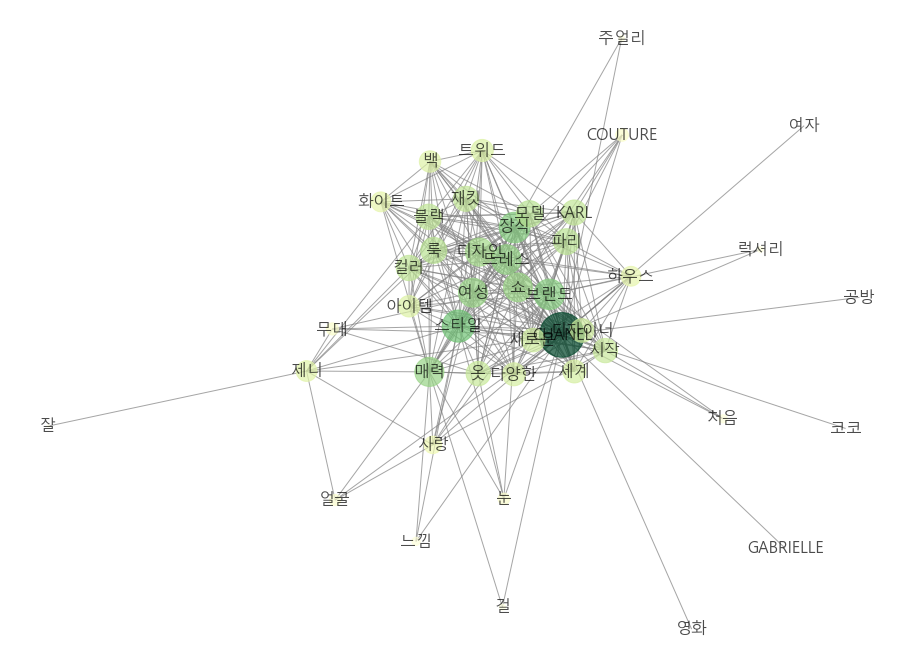

In [130]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.YlGn)

plt.savefig('./CHJE_top50word-04.png', bbox_inches = 'tight')
plt.show()


In [31]:
# ['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']